##### Metody obliczeniowe w nauce i technice

## Laboratorium 5 - Równania nieliniowe

### Sprawozdanie sporządził: Marcin Zielonka

### Wstęp

Do realizacji zadań skorzystam z gotowych funkcjonalności zawartych w bibliotekach:

* `mpmath`
* `matplotlib`

In [20]:
from mpmath import *
from matplotlib import pyplot as plt

Dodatkowo, do sprawdzenia napisanych algorytmów użyję poniższych funkcji testowych:

* $f_1(x)=\cos(x)\cosh(x)-1$, $[\frac{3}{2}\pi,2\pi]$
* $f_2(x)=\frac{1}{x}-\tan(x)$, $[0,\frac{\pi}{2}]$
* $f_3(x)=2^{-x}+e^x+2\cos(x)-6$, $[1,3]$

In [21]:
def f1(x):
    return cos(x) * cosh(x)-1

In [22]:
def f2(x):
    return 1/x - tan(x)

In [23]:
def f3(x):
    return pow(2, -x) + exp(x) + 2 * cos(x) - 6

Dla zminimalizowania ilości kodu, wyodrębnię funkcję rysujacą wykres danej funkcji w danym przedziale:

In [24]:
def show_function_diagram(function, valFrom, valTo, points, y_top = None, y_bottom = None):
    plot_x = linspace(valFrom, valTo, 1000)
    plot_y = list(map(function, plot_x))
    
    plt.plot(plot_x, plot_y)
    plt.grid()
    
    if y_top != None:
        plt.ylim(top=y_top)
    
    if y_bottom != None:
        plt.ylim(bottom=y_bottom)
    
    for x, y in points:
        plt.scatter(x, y)
    
    plt.show()

### Zadanie 1: Metoda bisekcji

Napisz funkcję realizującą metodę bisekcji dla danej funkcji f w oparciu o arytmetykę o
zmiennej precyzji (`mpmath.mpf`). Funkcja przyjmuje następujące argumenty:

* Minimalną precyzję obliczeń (liczba cyfr znaczących)
* Krańce przedziału
* Błąd bezwzględny obliczeń

Funkcja ma zwracać wyznaczone miejsce zerowe, wyliczoną wartość w miejscu zerowym oraz liczbę iteracji potrzebną do uzyskania określonej dokładności. Przetestuj działanie metody dla funkcji podanych na początku instrukcji. Jaka liczba iteracji jest potrzebna do uzyskania bezwzględnej dokładności rzędu: $10^{−7}$, $10^{−15}$, $10^{−33}$? W jaki sposób możemy obliczyć k pierwszych dodatnich pierwiastków funkcji $f_1(x)$?

In [25]:
def bisec(function, min_precision, val_from, val_to, epsilon):
    mp.dps = min_precision
    
    x = val_from
        
    iterations = 0
    
    if function(val_from) * function(val_to) > 0:
        return None
    
    while((val_to - val_from) >= epsilon):
        iterations += 1
                
        x = (val_from + val_to) / 2
        
        if function(x) == 0:
            break
        elif function(x) * function(val_from) < 0:
            val_to = x
        else:
            val_from = x
            
    return x, function(x), iterations


Bisection method for function 1 with epsilon: 0.0000000999999999999999954748111825886259:
x: 4.730041, y: 2.518296e-6, iterations: 24

Bisection method for function 1 with epsilon: 1.0e-15:
x: 4.7300407448627, y: 3.574918139293e-14, iterations: 51

Bisection method for function 1 with epsilon: 1.0e-33:
x: 4.73004074486270402602404810083388, y: -4.33334237487128066937595037081609e-33, iterations: 111



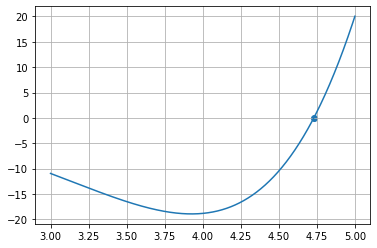

Bisection method for function 2 with epsilon: 0.0000000999999999999999954748111825886259:
x: 0.8603335, y: 1.639128e-7, iterations: 24

Bisection method for function 2 with epsilon: 1.0e-15:
x: 0.86033358901938, y: 1.11022302462516e-15, iterations: 51

Bisection method for function 2 with epsilon: 1.0e-33:
x: 0.860333589019379762483893424137662, y: 1.54074395550978868244478235406794e-33, iterations: 111



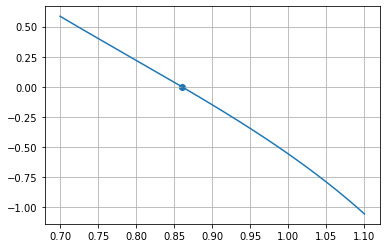

Bisection method for function 3 with epsilon: 0.0000000999999999999999954748111825886259:
x: 1.829384, y: 0.0, iterations: 23

Bisection method for function 3 with epsilon: 1.0e-15:
x: 1.82938360193385, y: 2.66453525910038e-15, iterations: 51

Bisection method for function 3 with epsilon: 1.0e-33:
x: 1.82938360193384881713621294681415, y: 7.70371977754894341222391177033971e-34, iterations: 111



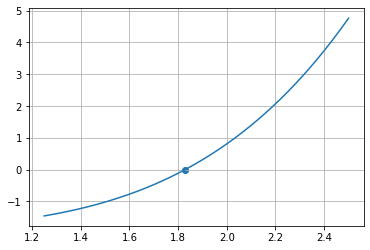

In [26]:
functions = [
    (f1, mpf(3 / 2 * pi), mpf(2 * pi), 3, 5), 
    (f2, mpf(1e-33), mpf(pi / 2), 0.7, 1.1), 
    (f3, mpf(1), mpf(3), 1.25, 2.5)
]

epsilons = [
    (7, mpf(1e-7)), 
    (15, mpf(1e-15)), 
    (33, mpf(1e-33))
]

for idx, data in enumerate(functions):
    function, val_from, val_to, plot_x_from, plot_x_to = data
                                               
    for idx_2, data in enumerate(epsilons):
        precission, epsilon = data
        print(f'Bisection method for function {idx + 1} with epsilon: {epsilon}:')
        
        x, y, iterations = bisec(function, precission, val_from, val_to, epsilon)
        
        print(f'x: {x}, y: {y}, iterations: {iterations}\n')
        
        if idx_2 == 2:
            show_function_diagram(function, plot_x_from, plot_x_to, [(x, y)])

Aby obliczyć minimalną liczbę iteracji potrzebną do uzyskania bezwzględnej dokładności $\epsilon$, skorzystamy ze wzoru na błąd bezwględny po $N$ próbach:

$$|x_{true}-x_N| \le \frac{b-a}{2^{N+1}}$$

Następnie przekształcając wzór otrzymamy:

$$\frac{\ln(\frac{b-a}{\epsilon})}{\ln(2)} - 1 < N$$

In [27]:
def get_min_iterations(val_from, val_to, epsilon):
    return int(ceil(log((val_to - val_from) / epsilon) / log(2) - 1))

In [28]:
bounds = [
    (mpf(3 / 2 * pi), mpf(2 * pi)),
    (mpf(1e-33), mpf(pi / 2)),
    (mpf(1), mpf(3))
]

epsilons = [mpf(1e-7), mpf(1e-15), mpf(1e-33)]

for val_from, val_to in bounds:
    for epsilon in epsilons:
        print(f'  val_from: {val_from} \n    val_to: {val_to}\n   epsilon: {epsilon}\niterations: {get_min_iterations(val_from, val_to, epsilon)}\n')

  val_from: 4.71238898038468985769396507491925 
    val_to: 6.28318530717958647692528676655901
   epsilon: 0.0000000999999999999999954748111825886259
iterations: 23

  val_from: 4.71238898038468985769396507491925 
    val_to: 6.28318530717958647692528676655901
   epsilon: 1.00000000000000007770539987666108e-15
iterations: 50

  val_from: 4.71238898038468985769396507491925 
    val_to: 6.28318530717958647692528676655901
   epsilon: 1.0000000000000000559673099762419e-33
iterations: 110

  val_from: 1.0000000000000000559673099762419e-33 
    val_to: 1.57079632679489661923132169163975
   epsilon: 0.0000000999999999999999954748111825886259
iterations: 23

  val_from: 1.0000000000000000559673099762419e-33 
    val_to: 1.57079632679489661923132169163975
   epsilon: 1.00000000000000007770539987666108e-15
iterations: 50

  val_from: 1.0000000000000000559673099762419e-33 
    val_to: 1.57079632679489661923132169163975
   epsilon: 1.0000000000000000559673099762419e-33
iterations: 110

  val_from:

Aby obliczyć k pierwszych dodatnich pierwiastków funkcji $f_1(x)$ warto przeanalizować jak wygląda wykres funkcji $f_1$:

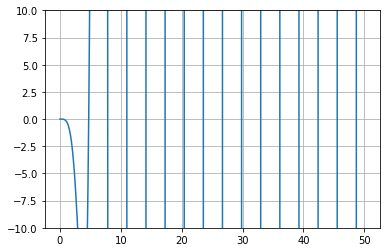

In [29]:
show_function_diagram(f1, 0, 50, [], 10, -10)

Możemy zauważyć, że poprzez wykonanie bisekcji na kolejnych przedziałach $[x, x+1]$ począwszy od $0$ jesteśmy w stanie znaleźć $k$ kolejnych dodatnich pierwiastków funkcji $f_1$

In [30]:
def get_roots(function, k):
    all_roots = []
    
    x = 0
    while len(all_roots) < k:
        result = bisec(function, 20, mpf(x), mpf(x + 1), mpf(1e-15))
        
        if result != None:
            root_x, root_y, iterations = result
            all_roots.append((root_x, root_y))
        
        x += 1
    
    return all_roots

x: 0.99999999999999911182, y: -0.16626997486885036182
x: 4.7300407448627046492, y: 3.5921293405614430905e-14
x: 7.8532046240958370831, y: 6.0878732610625263533e-13
x: 10.995607838001670409, y: -1.4839897268077923472e-11
x: 14.137165491257463579, y: 4.1269934050855352353e-10
x: 17.278759657399480609, y: -1.3227953009030435935e-8
x: 20.420352245626060217, y: 3.2280142227981476854e-7
x: 23.56194490204045433, y: -6.3666189089550395336e-6
x: 26.703537555508186863, y: -0.00012146814437427757129
x: 29.845130209103253982, y: -0.0013041147802836115961


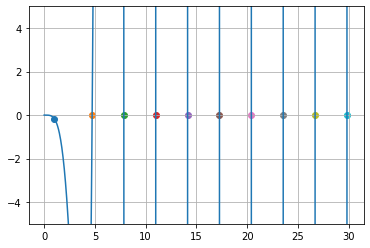

In [31]:
roots = get_roots(f1, 10)

for x, y in roots:
    print(f'x: {x}, y: {y}')
    
show_function_diagram(f1, 0, 30, roots, 5, -5)

### Zadanie 2: Metoda Newtona

Napisz funkcję realizującą metodę Newtona w oparciu o arytmetykę o zmiennej precyzji (`mpmath.mpf`). Funkcja ma wykorzystywać dwa kryteria stopu:

* maksymalną liczbę iteracji
* • moduł różnicy kolejnych przybliżeń mniejszy od danej wartości $\epsilon$

Oprócz przybliżonej wartości pierwiastka funkcja ma zwrócić liczbę iteracji potrzebną do uzyskania określonej dokładności ε. Przetestuj działanie metody dla funkcji podanych na początku instrukcji (dodatkowo dostępne pochodne tych funkcji). Porównaj zbieżność metody ze zbieżnością uzyskaną dla metody bisekcji.

Na potrzeby zadania definiuję również pierwsze pochodne wcześniej wspomnianych funkcji testowych:

* $\frac{\partial}{\partial x}f_1(x) = \cos(x)\sinh(x) - \sin(x)\cosh(x)$
* $\frac{\partial}{\partial x}f_2(x) = -\frac{1}{x^2} - \frac{1}{\cos^2(x)}$
* $\frac{\partial}{\partial x}f_3(x) = e^x - 2^{-x}\log(2) - 2\sin(x)$

In [32]:
def d_f1(x):
    return cos(x) * sinh(x) - sin(x) * cosh(x)

In [33]:
def d_f2(x):
    return -1 / pow(x, 2) - (1 / pow(cos(x), 2))

In [34]:
def d_f3(x):
    return exp(x) - pow(2, -x) * log(2) - 2 * sin(x)

In [35]:
def newton(function, derivative, min_precision, val_from, val_to, epsilon, max_iterations):
    mp.dps = min_precision

    prev_x = val_from
    x = val_from
    iterations = 0
    
    while True:   
        iterations += 1
        
        fx = function(x)
        dx = derivative(x)
        
        if dx == 0:
            print('Derivative equals zero')
            return None
        
        prev_x = x
        x = x - fx / dx
        
        if abs(x - prev_x) <= epsilon:
            return x, function(x), iterations
        
        if iterations > max_iterations:
            print('Max iterations exceeded')
            return None

Newton method for function 1 with epsilon: 9.9999999999999995475e-8:
x: 4.730041, y: -9.164214e-7, iterations: 4

Newton method for function 1 with epsilon: 1.0e-15:
x: 4.7300407448627, y: -1.53210777398272e-14, iterations: 5

Newton method for function 1 with epsilon: 1.0e-33:
x: 4.73004074486270402602404810083388, y: -4.33334237487128066937595037081609e-33, iterations: 6



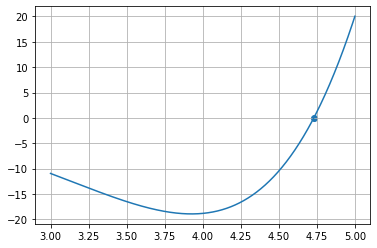

Newton method for function 2 with epsilon: 0.0000000999999999999999954748111825886259:
x: 0.8603336, y: 0.0, iterations: 13

Newton method for function 2 with epsilon: 1.0e-15:
x: 0.86033358901938, y: 0.0, iterations: 14

Newton method for function 2 with epsilon: 1.0e-33:
x: 0.860333589019379762483893424137662, y: 1.92592994438723585305597794258493e-34, iterations: 15



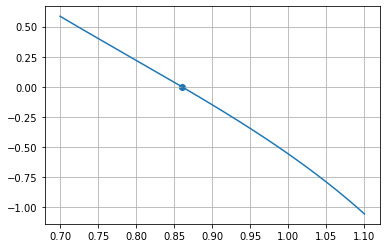

Newton method for function 3 with epsilon: 0.0000000999999999999999954748111825886259:
x: 1.829384, y: 0.0, iterations: 8

Newton method for function 3 with epsilon: 1.0e-15:
x: 1.82938360193385, y: 0.0, iterations: 9

Newton method for function 3 with epsilon: 1.0e-33:
x: 1.82938360193384881713621294681415, y: 0.0, iterations: 10



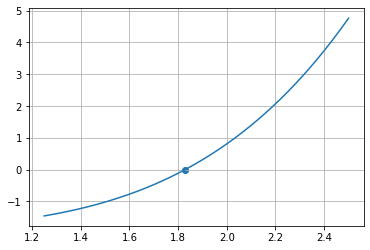

In [36]:
functions = [
    (f1, d_f1, mpf(3 / 2 * pi), mpf(2 * pi), 3, 5), 
    (f2, d_f2, mpf(0.001), mpf(pi / 2), 0.7, 1.1), 
    (f3, d_f3, mpf(1), mpf(3), 1.25, 2.5)
]

epsilons = [
    (7, mpf(1e-7)), 
    (15, mpf(1e-15)), 
    (33, mpf(1e-33))
]

for idx, data in enumerate(functions):
    function, derivative, val_from, val_to, plot_x_from, plot_x_to = data
    
    for idx_2, data in enumerate(epsilons):
        precission, epsilon = data
        print(f'Newton method for function {idx + 1} with epsilon: {epsilon}:')
        
        result = newton(function, derivative, precission, val_from, val_to, epsilon, 200)
        
        if result == None:
            print('Solution not found\n')
            continue
        
        x, y, iterations = result
        
        print(f'x: {x}, y: {y}, iterations: {iterations}\n')
        
        if idx_2 == 2:
            show_function_diagram(function, plot_x_from, plot_x_to, [(x, y)])

#### Porównanie zbieżności metody Newtona z metoda bisekcji:

Porównanie dla wyników metod dla funkcji $f_1$:

* 7 miejsc znaczących:
  * metoda bisekcji: 4.730041 (24)
  * metoda newtona:  4.730041 (4)


* 15 miejsc znaczących:
  * metoda bisekcji: 4.7300407448627 (51)
  * metoda newtona:  4.7300407448627 (5)
  
  
* 33 miejsca znaczące:
  * metoda bisekcji: 4.73004074486270402602404810083388 (111)
  * metoda newtona:  4.73004074486270402602404810083388 (6)
  

Porównujac wyniki dla wszystkich sprawdzanych dokładności, widać, że obie metody dają identyczne wyniki. Widzimy również, że metoda Newtona wymaga o wiele mniejszej ilości iteracji w porównaniu do metody bisekcji, aby otrzymać żądany wynik.

### Zadanie 3: Metoda siecznych

Napisz funkcję realizującą metodę siecznych w oparciu o arytmetykę o zmiennej precyzji (`mpmath.mpf`). Funkcja powinna stosować te same kryteria stopu co funkcja realizująca metodę Newtona. Przetestuj działanie metody dla funkcji podanych na początku instrukcji. Porównaj zbieżność metody ze zbieżnością uzyskaną dla metody bisekcji oraz metody Newtona.

In [37]:
def secant(function, min_precision, val_from, val_to, epsilon, max_iterations):
    mp.dps = min_precision
    
    prev_x = val_from
    x = val_to
    
    iterations = 0
    
    while True:
        if abs(x - prev_x) <= epsilon:
            return x, fx, iterations
        
        iterations += 1
        
        fx = function(x)
        fprevx = function(prev_x)
        
        if (fx - fprevx) == 0:
            print('Denominator equals 0')
            return None
        
        next_x = (fx * prev_x - fprevx * x) / (fx - fprevx)
        
        prev_x = x
        x = next_x
        
        if iterations > max_iterations:
            print('Max iterations exceeded')
            return None 

Secant method for function 1 with epsilon: 0.0000000999999999999999954748111825886259:
x: 4.730041, y: -9.164214e-7, iterations: 6

Secant method for function 1 with epsilon: 1.0e-15:
x: 4.7300407448627, y: -1.53210777398272e-14, iterations: 7

Secant method for function 1 with epsilon: 1.0e-33:
x: 4.73004074486270402602404810083388, y: -4.33334237487128066937595037081609e-33, iterations: 9



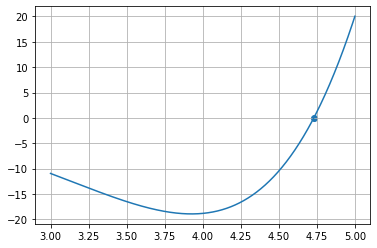

Secant method for function 2 with epsilon: 0.0000000999999999999999954748111825886259:
x: 0.001, y: 999.999, iterations: 2

Secant method for function 2 with epsilon: 1.0e-15:
x: 0.001, y: 999.998999999667, iterations: 2

Secant method for function 2 with epsilon: 1.0e-33:
x: 0.860333589019379762483893424137662, y: 1.92592994438723585305597794258493e-34, iterations: 24



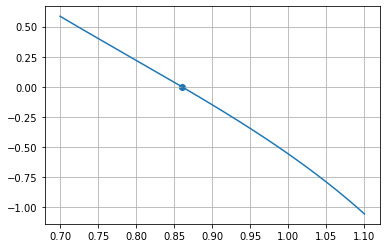

Secant method for function 3 with epsilon: 0.0000000999999999999999954748111825886259:
x: 1.829384, y: 0.0, iterations: 10

Secant method for function 3 with epsilon: 1.0e-15:
x: 1.82938360193385, y: -8.88178419700125e-16, iterations: 11

Secant method for function 3 with epsilon: 1.0e-33:
x: 1.82938360193384881713621294681415, y: 0.0, iterations: 13



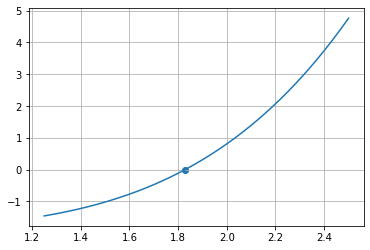

In [38]:
functions = [
    (f1, mpf(3 / 2 * pi), mpf(2 * pi), 3, 5), 
    (f2, mpf(0.001), mpf(pi / 2), 0.7, 1.1), 
    (f3, mpf(1), mpf(3), 1.25, 2.5)
]

epsilons = [
    (7, mpf(1e-7)), 
    (15, mpf(1e-15)), 
    (33, mpf(1e-33))
]

for idx, data in enumerate(functions):
    function, val_from, val_to, plot_x_from, plot_x_to = data
    
    for idx_2, data in enumerate(epsilons):
        precission, epsilon = data
        print(f'Secant method for function {idx + 1} with epsilon: {epsilon}:')
        
        result = secant(function, precission, val_from, val_to, epsilon, 200)
        
        if result == None:
            print('Solution not found\n')
            continue
        
        x, y, iterations = result
        
        print(f'x: {x}, y: {y}, iterations: {iterations}\n')
        
        if idx_2 == 2:
            show_function_diagram(function, plot_x_from, plot_x_to, [(x, y)])

#### Porównanie zbieżności metod: bisekcji, Newtona i siecznych:

Porównanie dla wyników metod dla funkcji $f_1$ (w nawiasach podana liczba iteracji):

* 7 miejsc znaczących:
  * metoda bisekcji:  4.730041 (24)
  * metoda newtona:   4.730041 (4)
  * metoda siecznych: 4.730041 (6)


* 15 miejsc znaczących:
  * metoda bisekcji:  4.7300407448627 (51)
  * metoda newtona:   4.7300407448627 (5)
  * metoda siecznych: 4.7300407448627 (7)
  
  
* 33 miejsca znaczące:
  * metoda bisekcji:  4.73004074486270402602404810083388 (111)
  * metoda newtona:   4.73004074486270402602404810083388 (6)
  * metoda siecznych: 4.73004074486270402602404810083388 (9)
  

Porównujac wyniki dla wszystkich sprawdzanych dokładności, widać, że wszystkie metody dają identyczne wyniki. Widzimy również, że zarówno metoda Newtona jak i siecznych wymagają o wiele mniejszej ilości iteracji w porównaniu do metody bisekcji, aby otrzymać żądany wynik.